In [56]:
import numpy as np
import qiskit
from qiskit.quantum_info.operators import Operator
from qiskit.extensions import UnitaryGate
from tools import *

Performing block encoding of $2\times2$ matrix on the form:
\begin{equation}
A=\frac{1}{2}(\alpha_1I+\alpha_2\sigma_x)=\frac{1}{2}\begin{pmatrix} \alpha_1 \alpha_2 \\ \alpha_2 \alpha_1
\end{pmatrix}
\end{equation}

In [57]:
# Defining arbitrary symmetric A
alpha_1, alpha_2 = 3, 4
A = 1/2 * np.array([[alpha_1, alpha_2],[alpha_2, alpha_1]])
print(A)

[[1.5 2. ]
 [2.  1.5]]


In [58]:
# Normalizing w. respect to spectral norm
spectral_norm = np.sqrt(np.max(np.linalg.eigvals(A.T@A-np.eye(2))))
A = 1/2*A/spectral_norm
print(A)

[[0.2236068 0.2981424]
 [0.2981424 0.2236068]]


In [59]:
# Updating alpha_1, alpha_2 definition
alpha_1, alpha_2 = 2*A[0,0], 2*A[0,1]
print(alpha_1,alpha_2)

0.4472135954999579 0.5962847939999439


In [60]:
print("That")
print(alpha_1/2, alpha_2/2)

That
0.22360679774997896 0.29814239699997197


In [61]:
# Defining rotation angles
theta_1 = np.arccos(alpha_1)
theta_2 = np.arccos(alpha_2) - theta_1
print(theta_1, theta_2)

1.1071487177940904 -0.17521753523460504


### Performing exact simulation

Initializing q_2 = |0>


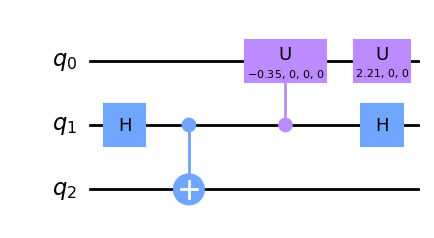

In [62]:
# Creating Quantum Circuit (Qubits initialized to |0> by default)
print("Initializing q_2 = |0>")
circ = QuantumCircuit(3)
circ.h(qubit=1)
circ.cx(control_qubit=1,
        target_qubit=2)
circ.cu(theta=2*theta_2,phi=0.0,gamma=0.0,lam=0.0,control_qubit=1,target_qubit=0) # N.B. Remember to rotate by the double amount
circ.u(theta=2*theta_1, phi=0.0,lam=0.0,qubit=0) # N.B. Remember to rotate by the double amount
circ.h(qubit=1)
circ.draw('mpl')

In [63]:
type(circ)

qiskit.circuit.quantumcircuit.QuantumCircuit

In [64]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
statevector_result = np.real_if_close(np.array(result.data()['statevector']))
print(statevector_result)

[ 0.2236068   0.4472136   0.2236068   0.4472136   0.2981424   0.40138649
 -0.2981424  -0.40138649]


Initializing q_2 = |1>


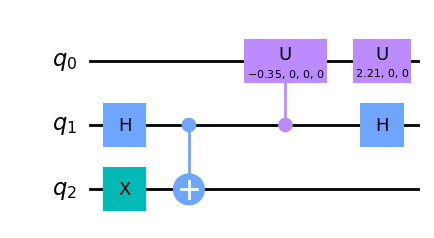

In [65]:
# Creating Quantum Circuit (Qubits initialized to |0> by default)
print("Initializing q_2 = |1>")
circ = QuantumCircuit(3)
circ.x(qubit=2)
circ.h(qubit=1)
circ.cx(control_qubit=1,
        target_qubit=2)
circ.cu(theta=2*theta_2,phi=0.0,gamma=0.0,lam=0.0,control_qubit=1,target_qubit=0) # N.B. Remember to rotate by the double amount
circ.u(theta=2*theta_1, phi=0.0,lam=0.0,qubit=0) # N.B. Remember to rotate by the double amount
circ.h(qubit=1)
circ.draw('mpl')

In [66]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
statevector_result = np.real_if_close(np.array(result.data()['statevector']))
print(statevector_result)

[ 0.2981424   0.40138649 -0.2981424  -0.40138649  0.2236068   0.4472136
  0.2236068   0.4472136 ]


### Simulating quantum device

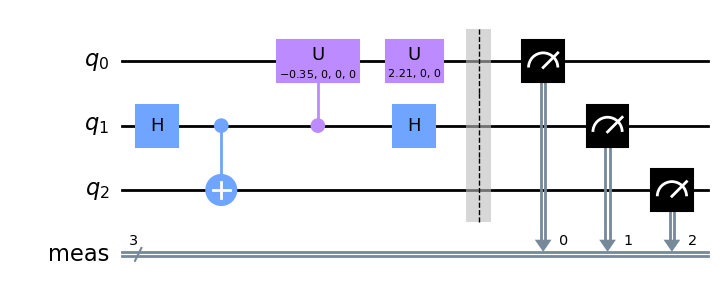

In [67]:
# Creating Quantum Circuit (Qubits initialized to |0> by default)
circ = QuantumCircuit(3)
#circ.x(qubit=2)
circ.h(qubit=1)
circ.cx(control_qubit=1,
        target_qubit=2)
circ.cu(theta=2*theta_2,phi=0.0,gamma=0.0,lam=0.0,control_qubit=1,target_qubit=0) # N.B. Remember to rotate by the double amount
circ.u(theta=2*theta_1, phi=0.0,lam=0.0,qubit=0) # N.B. Remember to rotate by the double amount
circ.h(qubit=1)
circ.measure_all()
circ.draw('mpl')

[0.20491995 0.42733732 0.19263794 0.43972648 0.31093357 0.41575421
 0.31093357 0.42274216]


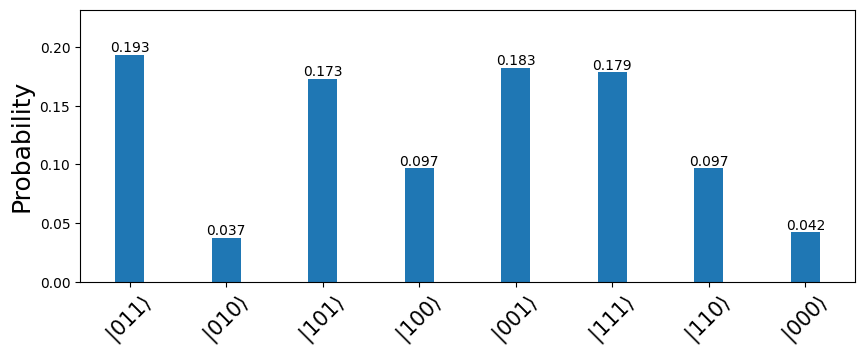

In [68]:
backend = Aer.get_backend('qasm_simulator')
backend.shots = 10000
result = execute(circ, backend).result()
counts = result.get_counts()
print(get_state_vector(counts=counts))
plot_count_histogram(counts=counts)

### Encoding normalized real vector

In [69]:
b_1, b_2 = 1,2
b = np.array([b_1, b_2])/np.sqrt(b_1**2+b_2**2)
print(b)

[0.4472136  0.89442719]


In [70]:
theta = 2*np.arccos(b[0])
phi = 0 # Choose phi depending on sign of second entry in b vector.
lmbda = 0
theta, phi

(2.214297435588181, 0)

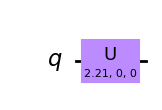

In [71]:
# Creating Quantum Circuit (Qubits initialized to |0> by default)
circ = QuantumCircuit(1)
circ.u(theta=theta, phi=phi,lam=lmbda,qubit=0)
circ.draw('mpl')

In [72]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
statevector_result = np.real_if_close(np.array(result.data()['statevector']))
print(statevector_result)

[0.4472136  0.89442719]


In [73]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('unitary_simulator')
job = backend.run(circ)
result = job.result()
result.get_unitary()

Operator([[ 0.4472136 +0.j, -0.89442719+0.j],
          [ 0.89442719+0.j,  0.4472136 +0.j]],
         input_dims=(2,), output_dims=(2,))

# REMEMBER THAT QISKIT IS BACKWARDS!

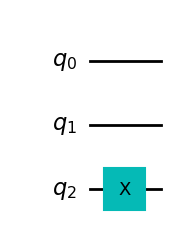

In [74]:
# Creating Quantum Circuit (Qubits initialized to |0> by default)
circ = QuantumCircuit(3)
circ.x(qubit=2)
circ.draw('mpl')

In [75]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
statevector_result = np.real_if_close(np.array(result.data()['statevector']))
print(statevector_result.astype(int))

[0 0 0 0 1 0 0 0]


In [76]:
print("this is the 'normal' way: \n")
print(qubit_vector('000').flatten())
print(qubit_vector('100').flatten())

this is the 'normal' way: 

[1 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0]
